# Data Cleaning

## Import Libraries

In [1]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numerize import numerize
from adjustText import adjust_text
import geopandas as gpd

## Import Dataframe

In [2]:
# Import dataframe
kp = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_provinsi.csv')
k_mk = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_modal_kerja_bank.csv')
k_i = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_investasi_bank.csv')
k_k = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/kredit_konsumsi_bank.csv')
pdrb = pd.read_csv('https://raw.githubusercontent.com/Fery-K/Capstone_Project_TETRIS/master/Datasets/pdrb.csv')

## Check Missing Value

In [3]:
print(kp.isna().sum())
print(k_mk.isna().sum())
print(k_i.isna().sum())
print(k_k.isna().sum())
print(pdrb.isna().sum())

no          0
provinsi    0
tahun       0
kredit      0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
bank      0
tahun     0
kredit    0
dtype: int64
no            0
provinsi      0
tahun_2011    1
tahun_2012    1
tahun_2013    0
tahun_2014    0
tahun_2015    0
tahun_2016    0
tahun_2017    0
tahun_2018    0
tahun_2019    0
tahun_2020    0
tahun_2021    0
tahun_2022    0
dtype: int64


## Detect Missing Value Location

In [4]:
col_pdrb = pdrb.columns.values.tolist()
for i in range(len(col_pdrb)):
    if pdrb[col_pdrb[i]].isna().sum() == 1:
        for j in range(pdrb.shape[0]):
            if pdrb[col_pdrb[i]].isna().loc[j]:
                print(f"Data hilang:\n[tahun,provinsi]: {[col_pdrb[i],pdrb['provinsi'].loc[j]]}")

Data hilang:
[tahun,provinsi]: ['tahun_2011', 'Kalimantan Utara']
Data hilang:
[tahun,provinsi]: ['tahun_2012', 'Kalimantan Utara']


## Impute Missing Value

In [5]:
pdrb.loc[33, 'tahun_2011'], pdrb.loc[33, 'tahun_2012'] = 0, 0

# Data Exploration and Visualization

In [6]:
# Lookup dataframe
print(kp.head())
print(pdrb.head())
print(k_k.head())
print(k_i.head())
print(k_mk.head())

   no        provinsi  tahun     kredit
0   1            Aceh   2002   1568.500
1   2  Sumatera Utara   2002  10058.580
2   3  Sumatera Barat   2002   3747.333
3   4            Riau   2002   8048.167
4   5           Jambi   2002   2581.833
   no        provinsi  tahun_2011  tahun_2012  tahun_2013  tahun_2014  \
0   1            Aceh    22704.80    23099.13    23228.59    23129.04   
1   2  Sumatera Utara    26711.24    28036.88    29339.21    30477.07   
2   3  Sumatera Barat    22638.75    23744.01    24857.64    25982.83   
3   4            Riau    71637.89    72396.34    72297.05    72390.88   
4   5           Jambi    30856.66    32417.72    34012.10    35878.09   

   tahun_2015  tahun_2016  tahun_2017  tahun_2018  tahun_2019  tahun_2020  \
0    22524.31    22835.29    23362.90    24013.79    24842.30    25018.28   
1    31637.41    32885.09    34183.58    35570.50    36853.59    36175.16   
2    27080.76    28164.93    29312.17    30470.80    31427.29    30696.21   
3    70769.78

## Visualisasi data kredit menurut provinsi

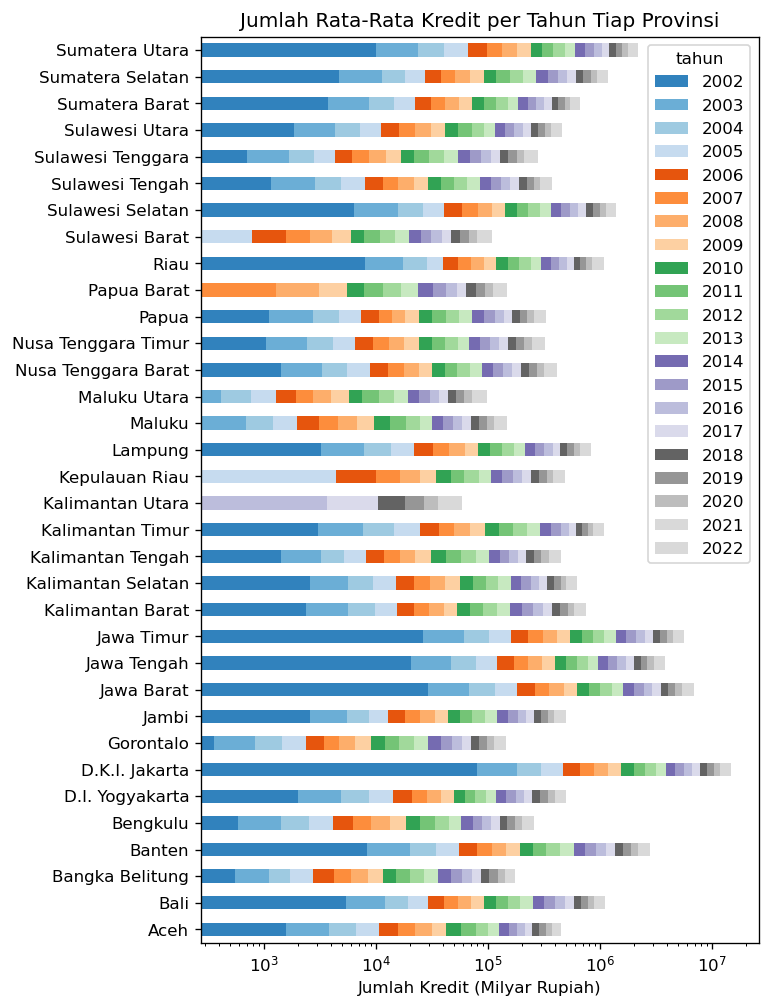

In [7]:
# Figure Setting
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 6, 10

# Input By User
bydata1 = 2002
bydata2 = 2022

# Data Prep
kp_pivot = kp.pivot(index='provinsi', columns='tahun', values='kredit').reset_index()

# Plotting
kp_pivot.plot(
    x='provinsi',
    y=kp_pivot.loc[:, bydata1:bydata2].columns,
    kind='barh',
    stacked=True,
    colormap='tab20c')


# Plot Setting
plt.title('Jumlah Rata-Rata Kredit per Tahun Tiap Provinsi')
plt.xlabel('Jumlah Kredit (Milyar Rupiah)')
plt.ylabel('')
plt.xscale('log')
plt.show()

## Visualisasi Pertumbuhan PDRB

C:\Users\Fery\AppData\Local\Temp\ipykernel_26056\350440889.py:30: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  highest_text = ax.annotate(f'Highest: {highest_prov}', xy=(highest.geometry.centroid.x, highest.geometry.centroid.y),
C:\Users\Fery\AppData\Local\Temp\ipykernel_26056\350440889.py:31: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  xytext=(highest.geometry.centroid.x + 1, highest.geometry.centroid.y + 2),
C:\Users\Fery\AppData\Local\Temp\ipykernel_26056\350440889.py:34: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  lowest_text = ax.annotate(f'Lowest: {lowest_prov

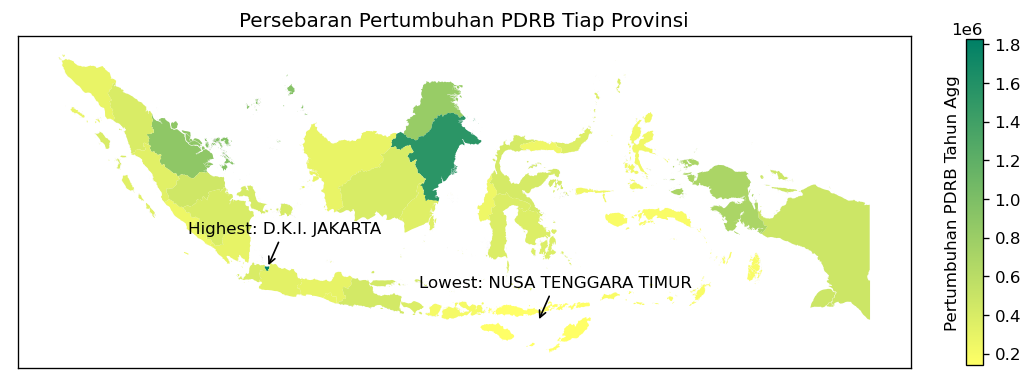

In [43]:
# Figure Setting
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 6

# Input By User
bydata = 'Agg'
agg_method = sum

# Data Prep
dg = gpd.read_file('https://github.com/Fery-K/Capstone_Project_TETRIS/raw/master/Provinsi%20Shapefiles/Batas%20Provinsi.shp')
pdrb['provinsi'] = pdrb['provinsi'].str.upper()    
dg['Provinsi'] = dg['Provinsi'].replace(['KEPULAUAN BANGKA BELITUNG', 'DKI JAKARTA', 'DAERAH ISTIMEWA YOGYAKARTA'],
                                       ['BANGKA BELITUNG', 'D.K.I. JAKARTA', 'D.I. YOGYAKARTA'])
pdrb.columns = ['no', 'provinsi'] + [(2011+i) for i in range(12)]
dg_pdrb = pd.merge(dg, pdrb, left_on='Provinsi', right_on='provinsi')

if bydata == 'Agg':
    dg_pdrb['Agg'] = dg_pdrb[[i for i in range(2011,2023)]].apply(agg_method, axis=1)

# Plotting
ax = dg_pdrb.plot(column=bydata, cmap='summer_r', legend=True, legend_kwds={'shrink': 0.6})

# Plot Setting
highest = dg_pdrb[dg_pdrb[bydata] == dg_pdrb[bydata].max()]
lowest = dg_pdrb[dg_pdrb[bydata] == dg_pdrb[bydata].min()]
highest_prov = dg_pdrb[dg_pdrb[bydata] == dg_pdrb[bydata].max()]['provinsi'].values[0]
lowest_prov = dg_pdrb[dg_pdrb[bydata] == dg_pdrb[bydata].min()]['provinsi'].values[0]


highest_text = ax.annotate(f'Highest: {highest_prov}', xy=(highest.geometry.centroid.x, highest.geometry.centroid.y),
                           xytext=(highest.geometry.centroid.x + 1, highest.geometry.centroid.y + 2),
                           ha='center', arrowprops=dict(facecolor='black', arrowstyle="->"))

lowest_text = ax.annotate(f'Lowest: {lowest_prov}', xy=(lowest.geometry.centroid.x, lowest.geometry.centroid.y),
                          xytext=(lowest.geometry.centroid.x + 1, lowest.geometry.centroid.y + 2),
                          ha='center', arrowprops=dict(facecolor='black', arrowstyle="->"))

plt.title('Persebaran Pertumbuhan PDRB Tiap Provinsi')
plt.xticks([])
plt.yticks([])
plt.ylabel(f'Pertumbuhan PDRB Tahun {bydata}', labelpad=-565)
plt.show()

## Visualisasi Kredit Berdasarkan Jenis Penggunaan

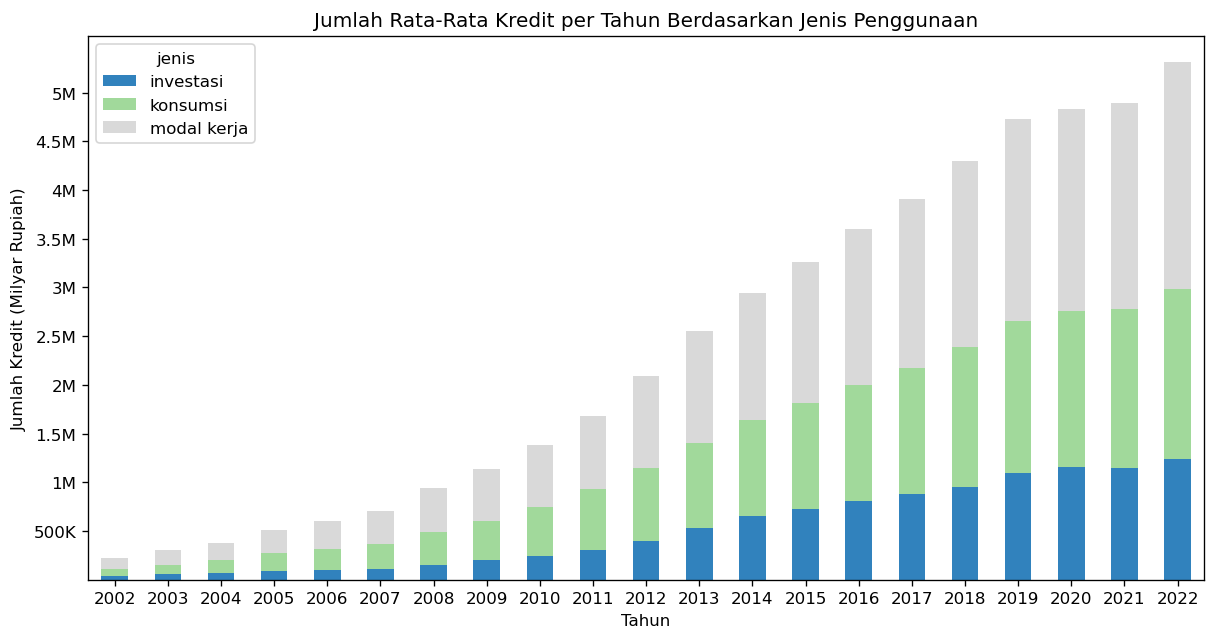

In [40]:
# Figure Setting
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 6

# Input By User
bydata = 'All'

# Data Prep
k_k_tahun = k_k.groupby('tahun').sum()
k_i_tahun = k_i.groupby('tahun').sum()
k_mk_tahun = k_mk.groupby('tahun').sum()
k_k_tahun['jenis'] = ['konsumsi' for i in range(k_k_tahun.shape[0])]
k_i_tahun['jenis'] = ['investasi' for j in range(k_i_tahun.shape[0])]
k_mk_tahun['jenis'] = ['modal kerja' for k in range(k_mk_tahun.shape[0])]

k_jenis = pd.concat([k_k_tahun, k_i_tahun, k_mk_tahun]).reset_index()
k_pivot = k_jenis.pivot(index='tahun', columns='jenis', values='kredit').reset_index()


# Plotting
if bydata == 'All':
    ax = k_pivot.plot(x='tahun', kind='bar', stacked=True, colormap='tab20c')
else:
    ax = k_pivot[['tahun'] + bydata].plot(x='tahun', kind='bar', stacked=True, colormap='tab20c')

# Plot Setting
x_ax = [0.5*i*(10**6) for i in range(1, 11)]
plt.title('Jumlah Rata-Rata Kredit per Tahun Berdasarkan Jenis Penggunaan')
plt.xticks(rotation=0)
plt.yticks(x_ax, [numerize.numerize(n) for n in x_ax])
plt.ylabel('Jumlah Kredit (Milyar Rupiah)')
plt.xlabel('Tahun')
plt.show()

## Visualisasi Hubungan Kredit dan PDRB

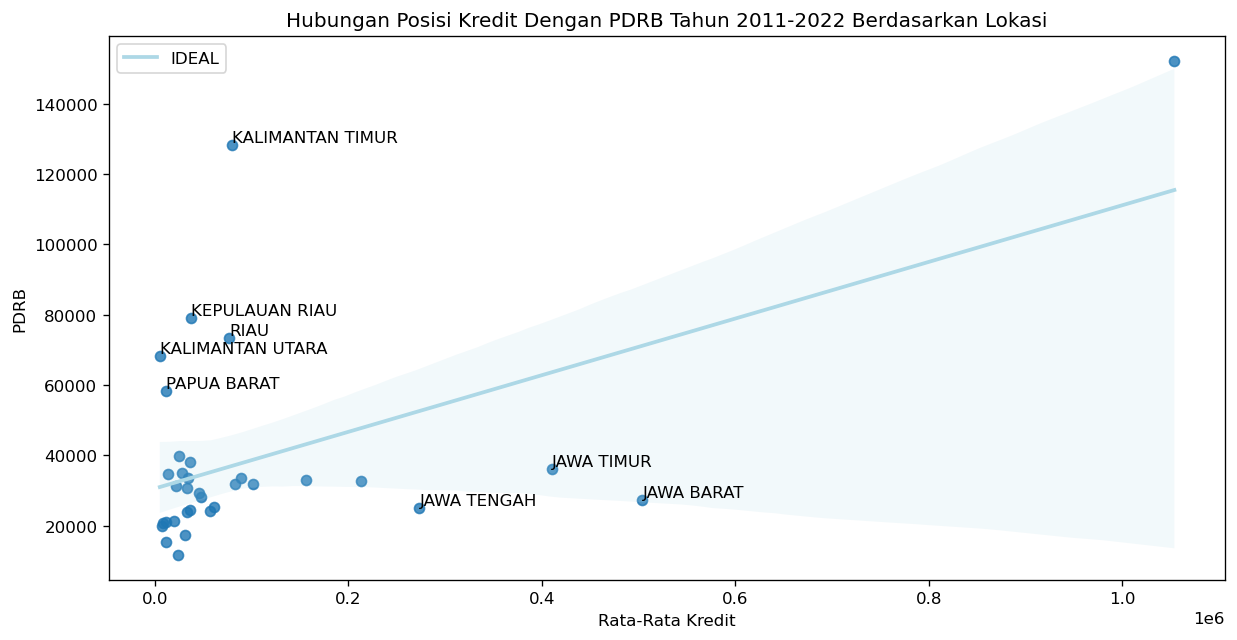

In [47]:
# Figure Setting
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 6

# Input By User
bydata = 'Agg'
agg_method = lambda x: x.mean()

# Data Prep
pdrb_ver = pd.melt(pdrb, id_vars=['no', 'provinsi'], 
                   value_vars=[(2011+i) for i in range(12)],
                   var_name = 'tahun',
                   value_name = 'PDRB')
kp['provinsi'] = kp['provinsi'].str.upper()
kp_pdrb = pd.merge(kp[kp['tahun'] >= 2011].reset_index(), 
                   pdrb_ver[pdrb_ver['provinsi'] != 'NASIONAL'], 
                   on=['provinsi', 'tahun'])

# Input Condition
if bydata == 'Agg':
    df = kp_pdrb.groupby('provinsi')[['provinsi', 'kredit', 'PDRB']].mean().reset_index()
    # Plotting
    sns.regplot(data= df, 
                x='kredit', y='PDRB',
                line_kws={'color':'lightblue', 'label':'IDEAL'})

    # Plot Setting
    plt.title('Hubungan Posisi Kredit Dengan PDRB Tahun 2011-2022 Berdasarkan Lokasi')
    plt.xlabel('Rata-Rata Kredit')
    plt.legend(loc='best')
    
    prov = ['KALIMANTAN TIMUR', 'KEPULAUAN RIAU', 'RIAU', 'KALIMANTAN UTARA', 'PAPUA BARAT',
           'JAWA BARAT', 'JAWA TIMUR', 'JAWA TENGAH']
    for p in prov:
        plt.text(df[df['provinsi'] == p]['kredit'],
                df[df['provinsi'] == p]['PDRB'],
                p, ha='left', va='bottom')
    plt.show()
else:
    df = kp_pdrb[kp_pdrb['provinsi'] == bydata]
    # Plotting
    sns.regplot(data=df, 
                x='kredit', y='PDRB', 
                line_kws={'color':'lightblue', 'label':bydata})
    corr = df['kredit'].corr(kp_pdrb['PDRB'])

    # Plot Setting
    plt.title('Hubungan Posisi Kredit Dengan PDRB Tahun 2011-2022 Berdasarkan Lokasi')
    plt.xlabel('Kredit')
    plt.legend(loc='best')
    plt.annotate(f'Correlation: {corr:.4f}', xy=(0.01, 0.9), xycoords='axes fraction')
    
    txt = [plt.text(df['kredit'].values[0], 
                    df['PDRB'].values[0], 
                    df['tahun'].values[0], 
                    ha='left', va='bottom')]
    
    for i in range(len(df)-1):
        if (df['PDRB'].values[i] > df['PDRB'].values[i+1]) | (df['kredit'].values[i] > df['kredit'].values[i+1]):
            txt.append(plt.text(df['kredit'].values[i+1], 
                                df['PDRB'].values[i+1], 
                                df['tahun'].values[i+1], 
                                ha='left', va='bottom', color='crimson'))
        else:
            txt.append(plt.text(df['kredit'].values[i+1], 
                                df['PDRB'].values[i+1], 
                                df['tahun'].values[i+1], 
                                ha='left', va='bottom'))
    adjust_text(txt)
    plt.show()

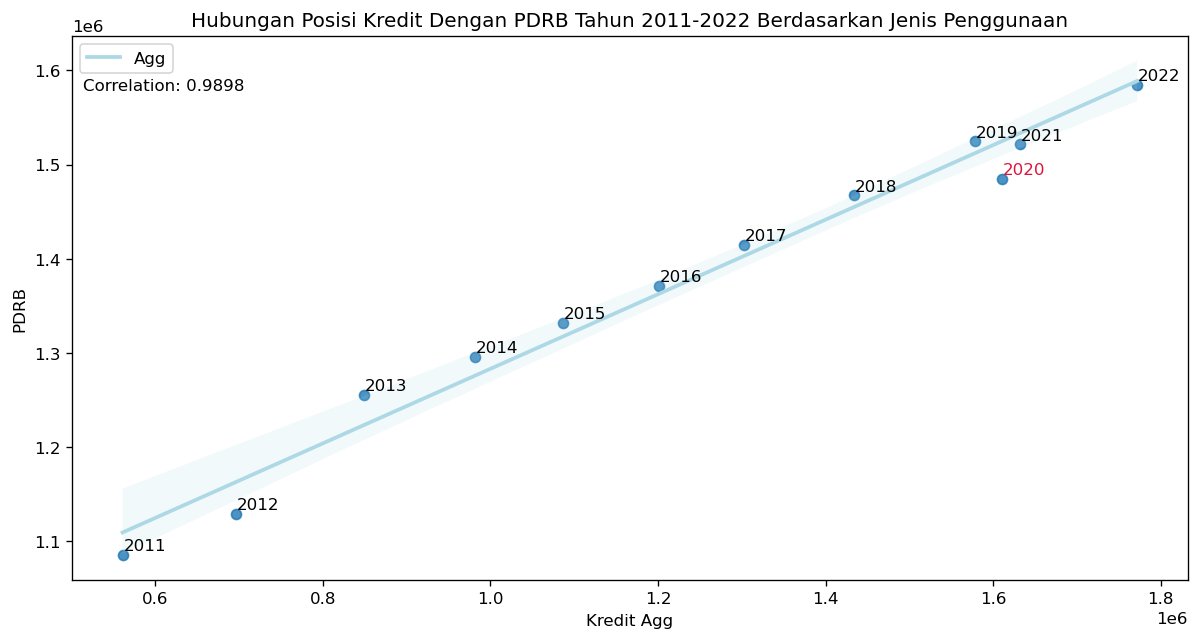

In [11]:
# Figure Setting
plt.rcParams['figure.dpi'] = 120
plt.rcParams['figure.figsize'] = 12, 6

# Input By User
bydata = 'Agg'
agg_method = lambda x: x.mean()

# Data Prep
pdrb_ver = pd.melt(pdrb, id_vars=['no', 'provinsi'], 
                   value_vars=[(2011+i) for i in range(12)],
                   var_name = 'tahun',
                   value_name = 'PDRB')
k_pdrb = pd.merge(k_pivot[k_pivot['tahun'] >= 2011], 
                  pdrb_ver.groupby('tahun')[['tahun', 'PDRB']].sum(), 
                  on='tahun')

if bydata == 'Agg':
    k_pdrb['Agg'] = k_pdrb[['investasi', 'konsumsi', 'modal kerja']].apply(agg_method, axis=1)

# Plotting    
sns.regplot(data=k_pdrb, 
            x=bydata, 
            y='PDRB', 
            line_kws={'color':'lightblue', 'label':bydata})
corr = k_pdrb[bydata].corr(k_pdrb['PDRB'])

# Plot Setting
plt.title('Hubungan Posisi Kredit Dengan PDRB Tahun 2011-2022 Berdasarkan Jenis Penggunaan')
plt.xlabel(f'Kredit {bydata}')
plt.legend(loc='upper left')
plt.annotate(f'Correlation: {corr:.4f}', xy=(0.01, 0.9), xycoords='axes fraction')

txt = [plt.text(k_pdrb[bydata][0], k_pdrb['PDRB'][0], k_pdrb['tahun'][0], ha='left', va='bottom')]
for i in range(len(k_pdrb)-1):
    if (k_pdrb['PDRB'][i] > k_pdrb['PDRB'][i+1]) | (k_pdrb[bydata][i] > k_pdrb[bydata][i+1]):
        txt.append(plt.text(k_pdrb[bydata][i+1], 
                            k_pdrb['PDRB'][i+1], 
                            k_pdrb['tahun'][i+1], 
                            ha='left', va='bottom', color='crimson'))
    else:
        txt.append(plt.text(k_pdrb[bydata][i+1], 
                            k_pdrb['PDRB'][i+1], 
                            k_pdrb['tahun'][i+1], 
                            ha='left', va='bottom'))
adjust_text(txt)
plt.show()